# Analyze your Runkeeper Fitness Data.

#### By : Yoshva Dani Juvenal .S

#### Email : yoshuvajuvenal52@gmail.com

#### Linkedin: https://www.linkedin.com/in/yoshva-dani-juvenal-155874273

# Introduction:

## Obtain and Review Raw Data:

This is a study project for analyzing fitness tracker data collected over the period 2012-2018.

In [1]:
# Import pandas
import pandas as pd
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns


# Define file containing dataset
runkeeper_file = "D:\Technocolabs Mini Project\Final Project\cardioActivities (1).csv"

# Create DataFrame with parse_dates and index_col parameters 
df_activities = pd.read_csv(runkeeper_file, parse_dates=True, index_col="Date")

# First look at exported data: select sample of 3 random rows 
display(df_activities.sample(3))

# Print DataFrame summary
display(df_activities.info())

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2017-08-07 16:26:00,ad867d0a-2a2b-4358-9a7a-65c2e098e8e6,Running,NaN,23.59,02:13:08,05:39,10.63,1668.000000,390,143.0,NaN,TomTom MySports Watch,2017-07-08-162643.gpx
2015-12-07 18:14:00,8e08fa81-ec96-4811-8ac2-db1250c9cee1,Running,NaN,19.04,01:51:58,05:53,10.20,1316.000000,295,133.0,NaN,NaN,2015-07-12-181414.gpx
2016-10-15 17:14:00,467ce511-b823-4bf8-a6b8-3de45da696b9,Running,NaN,13.49,01:14:11,05:30,10.91,942.999999,182,143.0,NaN,TomTom MySports Watch,2016-10-15-171434.gpx


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:00 to 2012-08-22 18:53:00
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

None

In [2]:
df_activities.head(10)

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2018-11-11 14:05:00,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40:00,05:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
2018-09-11 15:02:00,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,01:14:12,05:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2018-04-11 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,01:15:16,05:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
2018-01-11 14:03:00,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,01:14:25,05:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
2018-10-27 17:01:00,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,01:12:50,05:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx
2018-10-19 17:52:00,fe2cb3fc-6330-40fa-8a92-0f86f4e72282,Running,NaN,10.29,59:18:00,05:46,10.41,764.0,133,155.0,NaN,NaN,2018-10-19-175232.gpx
2018-10-14 17:28:00,96acedc9-d3d5-4aac-8df4-f549a6418c1d,Running,NaN,12.93,01:10:16,05:26,11.04,953.0,159,158.0,NaN,NaN,2018-10-14-172856.gpx
2018-12-10 17:41:00,3c91092b-e6f3-4565-b540-6b6537358006,Running,NaN,12.31,01:09:26,05:38,10.64,903.0,134,157.0,NaN,NaN,2018-10-12-174158.gpx
2018-06-10 16:45:00,4c163abe-3a57-42fd-b50b-7f365960cbd4,Cycling,NaN,19.63,01:26:26,04:24,13.63,577.0,210,79.0,NaN,NaN,2018-10-06-164502.gpx


# 1) Data Preprocessing:

In [3]:
df_activities.isnull().sum()

Activity Id                   0
Type                          0
Route Name                  507
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Calories Burned               0
Climb (m)                     0
Average Heart Rate (bpm)    214
Friend's Tagged             508
Notes                       277
GPX File                      4
dtype: int64

Dropping off the unwanted columns for analysis like:

1) Dropping off the "Route Name" column as only once the Route name has been mentioned in the entire data.
2) Dropping off the "Friend's Tagged" column as it has been never used.
3) Dropping off the "Notes" column as it is considered as an optional column and most of the time it has been left blank.
4) Dropping off the unnecessary columns like "GPX File","Activity ID" and "Calories Burned".


In [4]:
print(df_activities.columns)

Index(['Activity Id', 'Type', 'Route Name', 'Distance (km)', 'Duration',
       'Average Pace', 'Average Speed (km/h)', 'Calories Burned', 'Climb (m)',
       'Average Heart Rate (bpm)', 'Friend's Tagged', 'Notes', 'GPX File'],
      dtype='object')


In [5]:
drop_columns = ['Route Name','Friend\'s Tagged','Notes','GPX File','Activity Id','Calories Burned' ]
df_activities.drop(columns = drop_columns, inplace=True)

Replacing the "Other" activity type to "Unicycling" because that was always the "Other" activity. 

In [6]:
df_activities['Type'] = df_activities['Type'].str.replace('Other','Unicycling')

In [7]:
df_activities.head(20)

,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,,,,
2018-11-11 14:05:00,Running,10.44,58:40:00,05:37,10.68,130,159.0
2018-09-11 15:02:00,Running,12.84,01:14:12,05:47,10.39,168,159.0
2018-04-11 16:05:00,Running,13.01,01:15:16,05:47,10.37,171,155.0
2018-01-11 14:03:00,Running,12.98,01:14:25,05:44,10.47,169,158.0
2018-10-27 17:01:00,Running,13.02,01:12:50,05:36,10.73,170,154.0
2018-10-19 17:52:00,Running,10.29,59:18:00,05:46,10.41,133,155.0
2018-10-14 17:28:00,Running,12.93,01:10:16,05:26,11.04,159,158.0
2018-12-10 17:41:00,Running,12.31,01:09:26,05:38,10.64,134,157.0
2018-06-10 16:45:00,Cycling,19.63,01:26:26,04:24,13.63,210,79.0


In [8]:
df_activities.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:00 to 2012-08-22 18:53:00
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      508 non-null    object 
 1   Distance (km)             508 non-null    float64
 2   Duration                  508 non-null    object 
 3   Average Pace              508 non-null    object 
 4   Average Speed (km/h)      508 non-null    float64
 5   Climb (m)                 508 non-null    int64  
 6   Average Heart Rate (bpm)  294 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 31.8+ KB


In [9]:
df_activities.isnull().sum()

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

As we could find there are "214" missing values in the "Average Heart Rate" column. We can fill the missing values using "Mean Imputation" method. But while filling up the null values with the mean values we have to consider that the dataframe has different types of activities and the average heart rate also varies according to the type of activity.  

# 2) Dealing with the Missing Values:

### Calculating sample mean for Average Heart Rate (bpm) for each activity type:

In [10]:
avg_hr_running = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cycling = df_activities[df_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()
print(avg_hr_running,'&', avg_hr_cycling)

144.985559566787 & 124.4


In [11]:
#Split the dataframe into several, specific for different activities:
df_run = df_activities[df_activities['Type'] == 'Running'].copy()
df_walk = df_activities[df_activities['Type'] == 'Walking'].copy()
df_cycle = df_activities[df_activities['Type'] == 'Cycling'].copy()

In [12]:
#Filling the missing values with the counted means:
df_walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_running), inplace=True)
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycling), inplace=True)

In [13]:
df_run.isnull().sum()

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

In [14]:
df_walk.isnull().sum()

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

In [15]:
df_cycle.isnull().sum()

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

# 3) Plot Running Data:

As we found, most of the activities in the data were running (459 of them to be exact). There are only 29, 18, and two instances for cycling, walking, and unicycling, respectively.

A first visualization is a figure with four subplots, one for each running metric (each numerical column). Each subplot will have a different y-axis, which is explained in each legend. The x-axis, Date, is shared among all subplots.

C:\Users\Dani\AppData\Local\Temp\ipykernel_21136\1011342321.py:8: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  runs_subset_2012_2018 = df_run['2012':'2018']


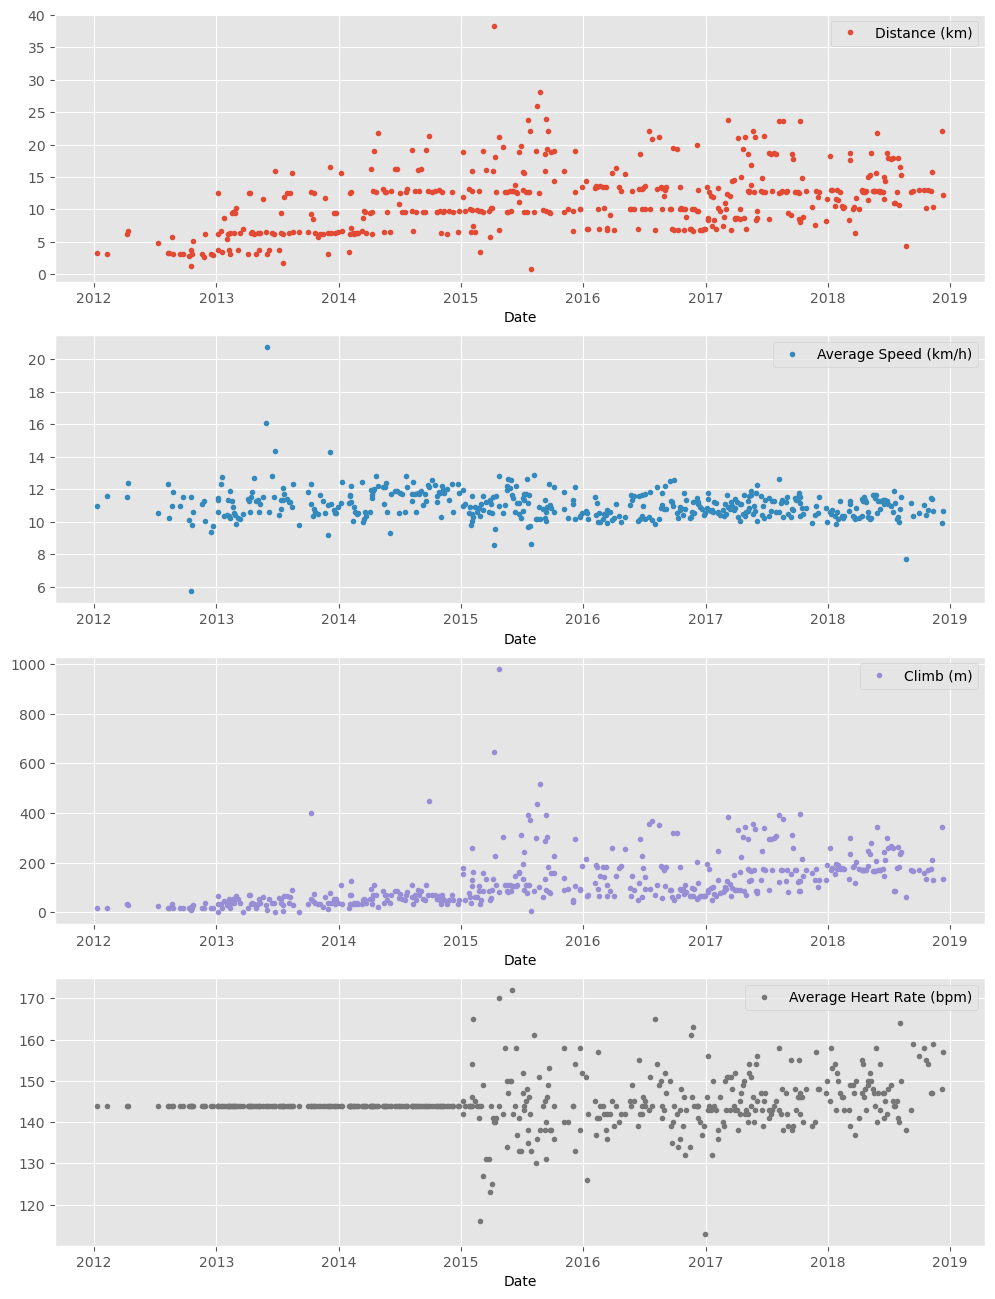

In [16]:
plt.style.use('ggplot')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
)

# Prepare data subsetting period from 2012 till 2018:
runs_subset_2012_2018 = df_run['2012':'2018']

# Create, plot and customize:
runs_subset_2012_2018.plot(subplots=True,
                           sharex=False,
                           figsize=(12,16),
                           linestyle='none',
                           marker='o',
                           markersize=3,
                          )

plt.show()

By looking the above plots we could find that before 2015 we don't have any record for the Average Heart Rate(bpm) and we filled those missing data using Mean Imputation method. By analysing the plot we could see that the Average Heart Rate remains constant before 2015 and after 2015 the Heart Rate Scatters. So to get Average lets use data from 2015 to 2018.

By using the resample() method in pandas we could be able to group a specific Time Span. To get average running stats we resample our data into Annual and weekly Stats.

In [17]:
#Prepare Running data for last 4 years:
runs_subset_2015_2018 = df_run['2015':'2018']

#Calculate Annual Statistics:
print('How my Average run looks in last 4 years:')
display(runs_subset_2015_2018.resample('A').mean())

#Calculate Weekly Statistics:
print('Weekly average run of last 4 years:')
display(runs_subset_2015_2018.resample('W').mean().mean())

#Mean Weekly Counts:
weekly_counts_avg = runs_subset_2015_2018['Distance (km)'].resample('W').count().mean()
print('How many trainings per week I had on average:', weekly_counts_avg)

How my Average run looks in last 4 years:


C:\Users\Dani\AppData\Local\Temp\ipykernel_21136\3928676279.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  runs_subset_2015_2018 = df_run['2015':'2018']
C:\Users\Dani\AppData\Local\Temp\ipykernel_21136\3928676279.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(runs_subset_2015_2018.resample('A').mean())


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-12-31,13.602805,10.998902,160.170732,143.353659
2016-12-31,11.411667,10.837778,133.194444,143.388889
2017-12-31,12.935176,10.959059,169.376471,145.247059
2018-12-31,13.339063,10.777969,191.218750,148.125000


Weekly average run of last 4 years:


C:\Users\Dani\AppData\Local\Temp\ipykernel_21136\3928676279.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(runs_subset_2015_2018.resample('W').mean().mean())


Distance (km)                12.817845
Average Speed (km/h)         10.863511
Climb (m)                   163.752395
Average Heart Rate (bpm)    145.009100
dtype: float64

How many trainings per week I had on average: 1.470873786407767


# 5) Visualizations using the Averages:

C:\Users\Dani\AppData\Local\Temp\ipykernel_21136\252318523.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  runs_subset_2015_2018 = df_run['2015':'2018']


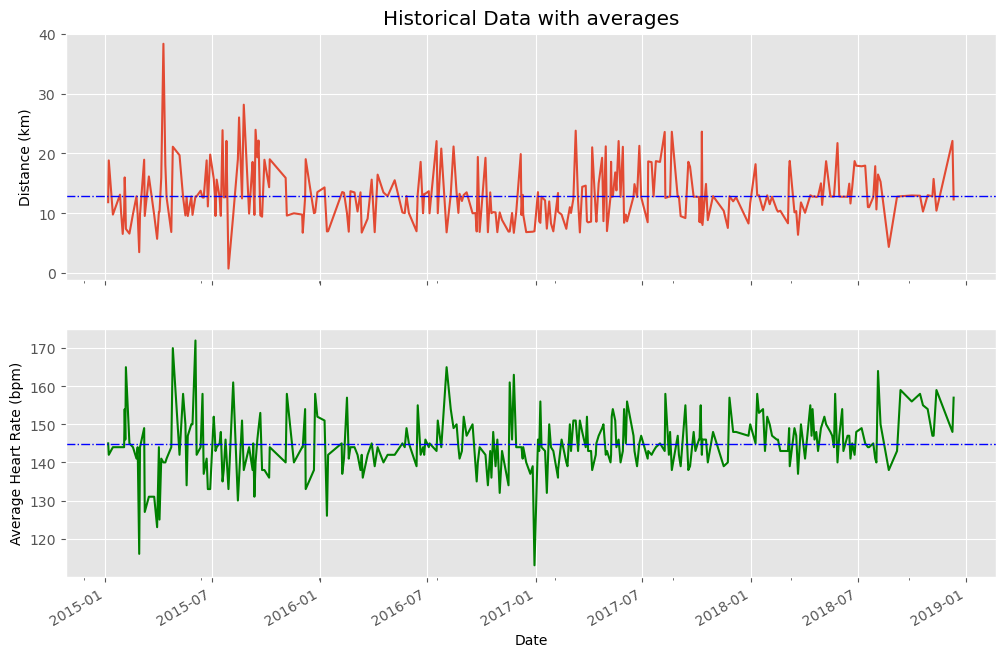

In [18]:
#Prepare Data to Assignment:
runs_subset_2015_2018 = df_run['2015':'2018']
runs_distance = runs_subset_2015_2018['Distance (km)']
runs_hr = runs_subset_2015_2018['Average Heart Rate (bpm)']

#Plotting:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12,8))

#Plot and Customize first subplot:
runs_distance.plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='Distance (km)', title='Historical Data with averages')
ax1.axhline(runs_distance.mean(), color = 'blue', linewidth=1, linestyle='-.')

#Plot and Customize second subplot:
runs_hr.plot(ax=ax2, color='green')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(), color = 'blue', linewidth=1, linestyle='-.')

#Show Plot:
plt.show()

From the above Visualizations we could say that the Average Distance falls around 12.8(km) and Average Heart Rate (bpm) falls around 145(bpm). 